In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("heart.csv")

In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Dataset Overview: Heart Disease Dataset

This dataset contains clinical and diagnostic information of patients and is used to predict the presence of heart disease.
- Total rows (patients): 303  
- Total columns (features): 14  

Each row represents one patient, and each column represents a medical attribute.


## Feature Description
- age: Age of the patient (in years)
- sex: Gender of the patient  
  - 1 = Male  
  - 0 = Female
- cp (Chest Pain Type):
  - 0 = Typical angina  
  - 1 = Atypical angina  
  - 2 = Non-anginal pain  
  - 3 = Asymptomatic
- trestbps: Resting blood pressure (in mm Hg)
- chol: Serum cholesterol level (mg/dl)
- fbs: Fasting blood sugar  
  - 1 = > 120 mg/dl  
  - 0 = ≤ 120 mg/dl
- restecg: Resting electrocardiographic results  
  - 0 = Normal  
  - 1 = ST-T wave abnormality  
  - 2 = Left ventricular hypertrophy
- thalach: Maximum heart rate achieved
- exang: Exercise-induced angina  
  - 1 = Yes  
  - 0 = No
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment  
  - 0 = Downsloping  
  - 1 = Flat  
  - 2 = Upsloping
- ca: Number of major vessels colored by fluoroscopy (0–3)
- thal: Thalassemia status  
  - 1 = Normal  
  - 2 = Fixed defect  
  - 3 = Reversible defect


## Target Variable
- target: Indicates presence of heart disease  
  - 1 = Heart disease present  
  - 0 = No heart disease  

This is a binary classification problem, where the goal is to predict whether a patient has heart disease based on clinical features.


## Initial Observations
- The dataset contains both numerical and categorical medical features.
- No missing values were observed in the dataset.
- The dataset size is suitable for applying classical machine learning algorithms such as Logistic Regression, Decision Trees, and Random Forest.


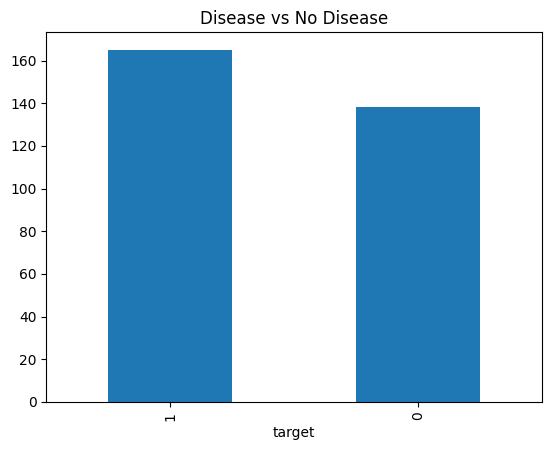

In [30]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar')
plt.title("Disease vs No Disease")
plt.show()


In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- No missing values present in the dataset

In [32]:
df.duplicated().sum()

np.int64(1)

In [33]:
df = df.drop_duplicates()

In [35]:
x = df.drop("target", axis=1)
y = df["target"]

- Features(x) contain patient clinical data, targt(y) indicates presence of heart disease 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

- Scaling ensures all features contribute equally to the model

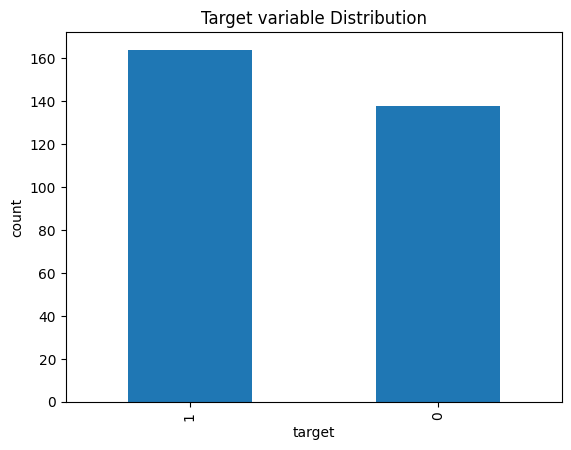

In [37]:
import matplotlib.pyplot as plt
df["target"].value_counts().plot(kind="bar")
plt.xlabel("target")
plt.ylabel("count")
plt.title("Target variable Distribution")
plt.show()

- Daatset is fairly balanced between patients with and without heart disease

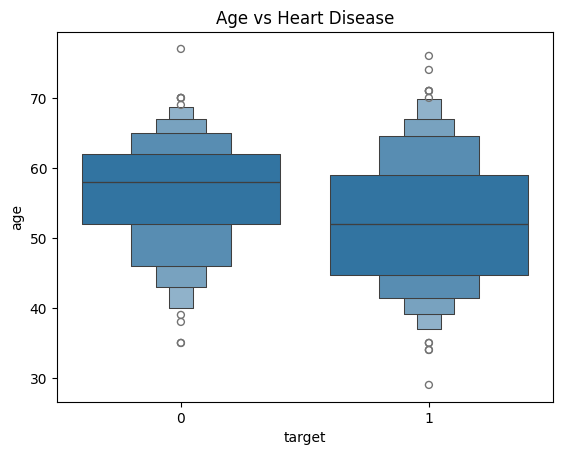

In [38]:
import seaborn as sns

sns.boxenplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

- Patients with heart disease tend to be older

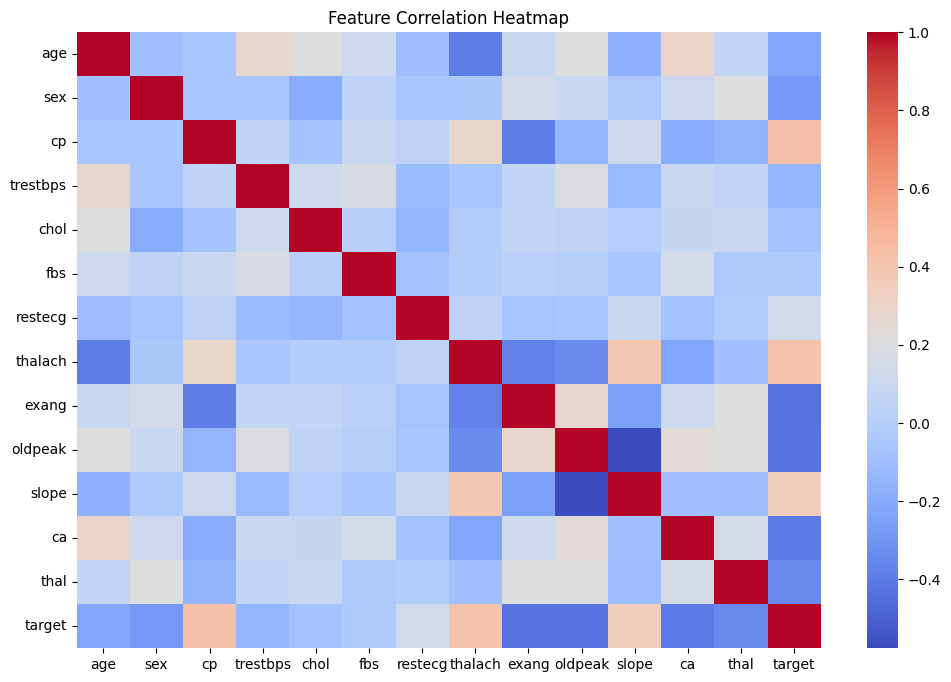

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

- Features like cp, thalach, and exang show corelation with target

## Summary
- Cheched for missing and duplicate values
- Performed feature scaling
- Conducted basic EDA to understand feature relationships
- Prepared dataset for machine learning models